In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing = pd.DataFrame(pd.read_csv("/content/Housing.csv"))

In [ ]:
print(housing.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
print(housing.shape)

(545, 13)


In [ ]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [ ]:
print(housing.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
print(housing.isnull().sum()*100/housing.shape[0])

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


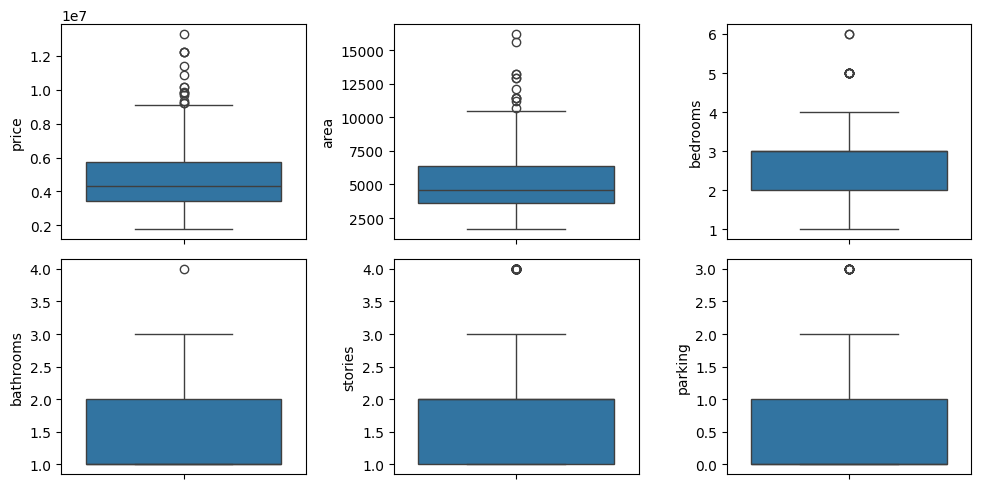

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

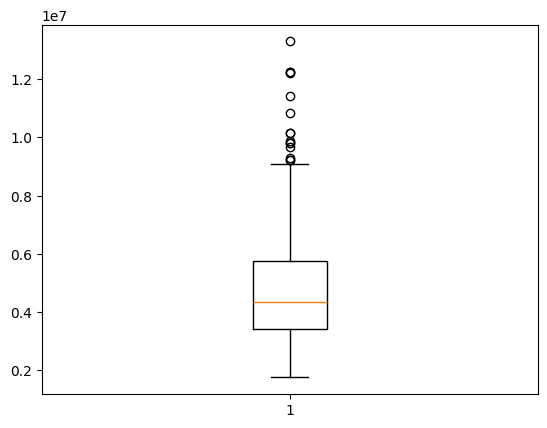

In [9]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

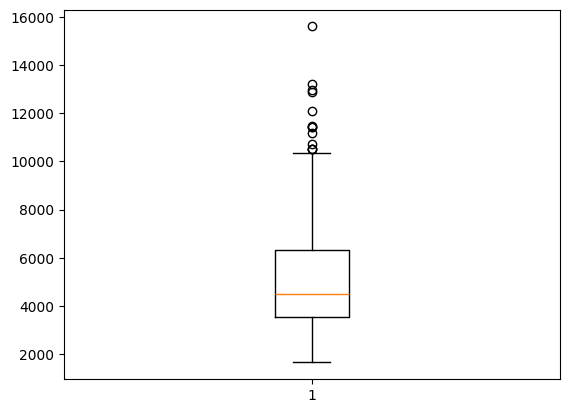

In [10]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

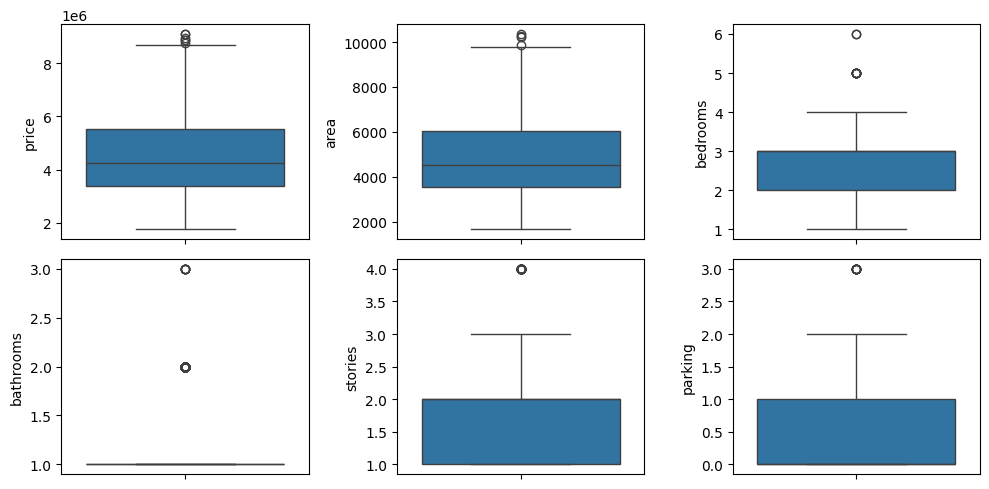

In [11]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

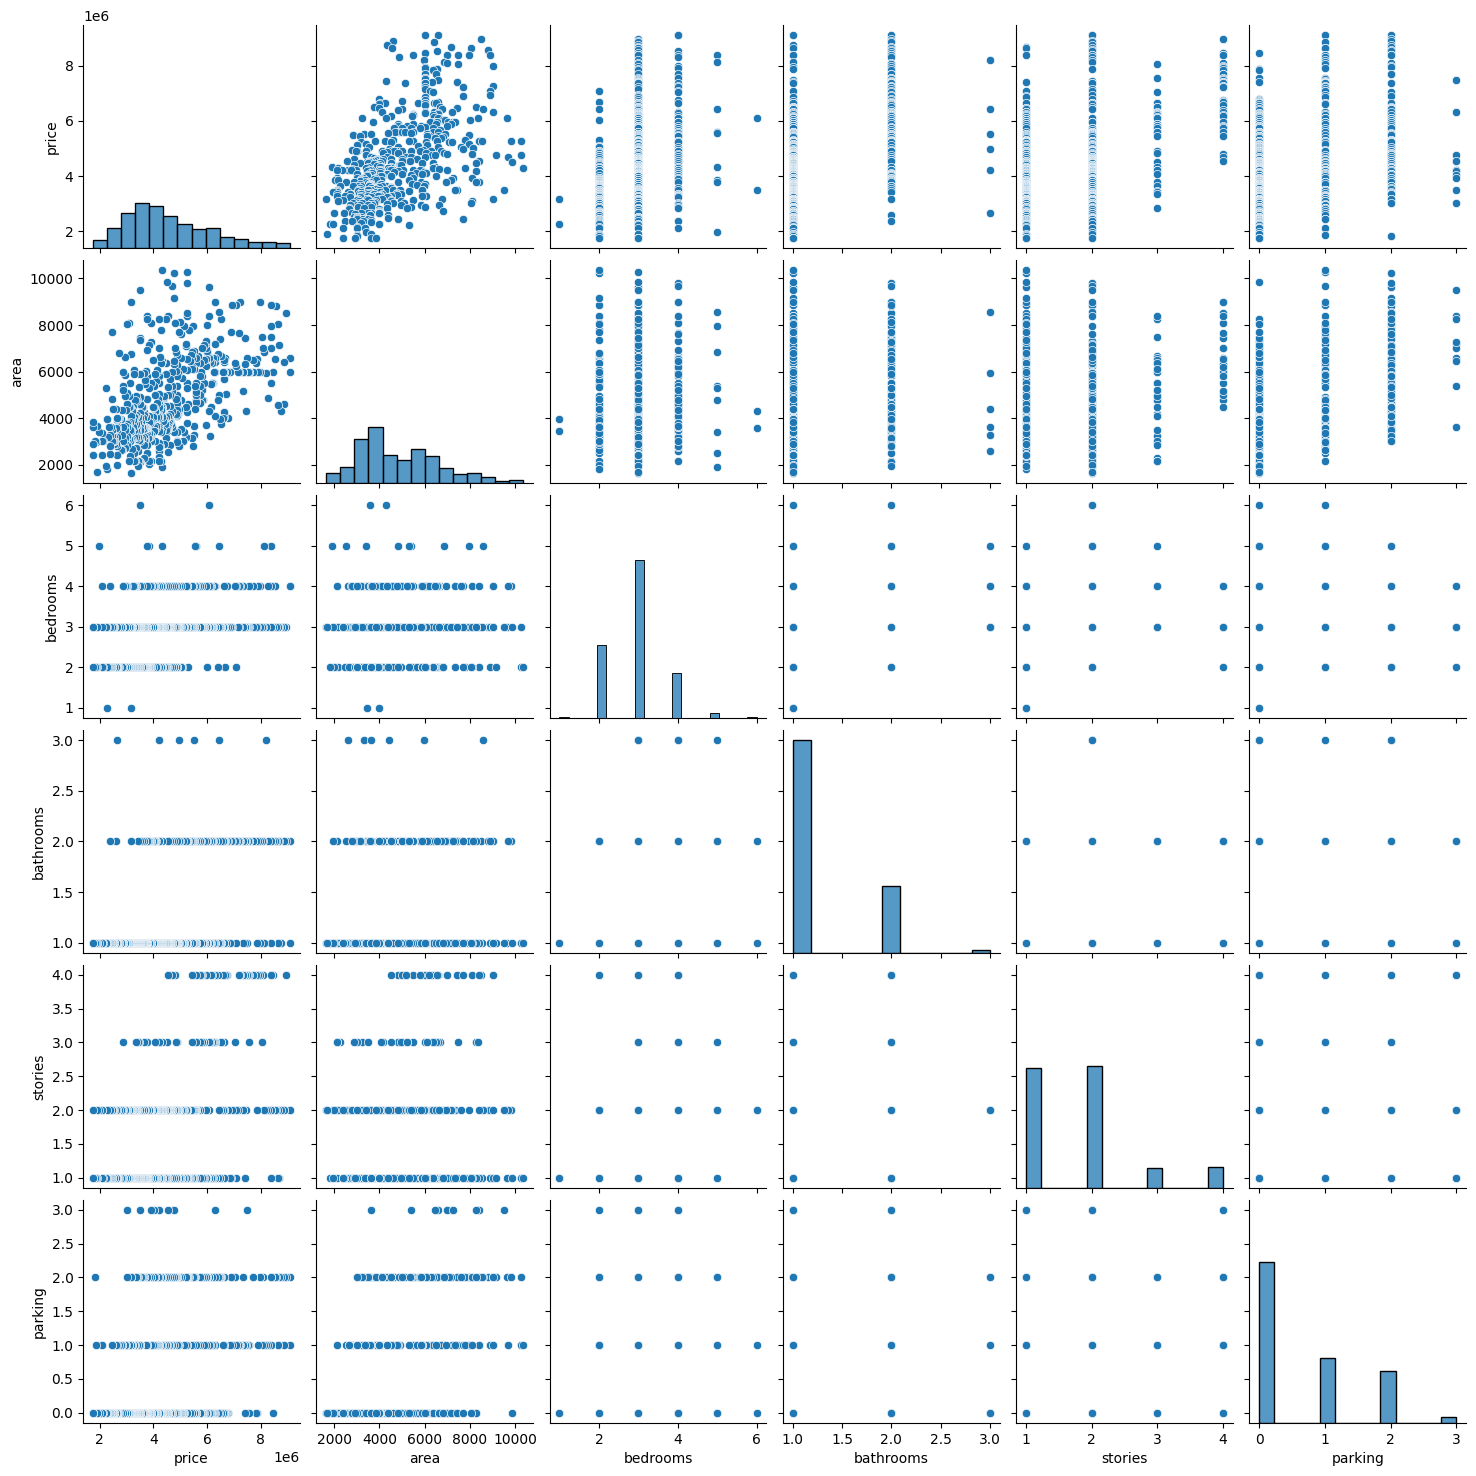

In [12]:
sns.pairplot(housing)
plt.show()

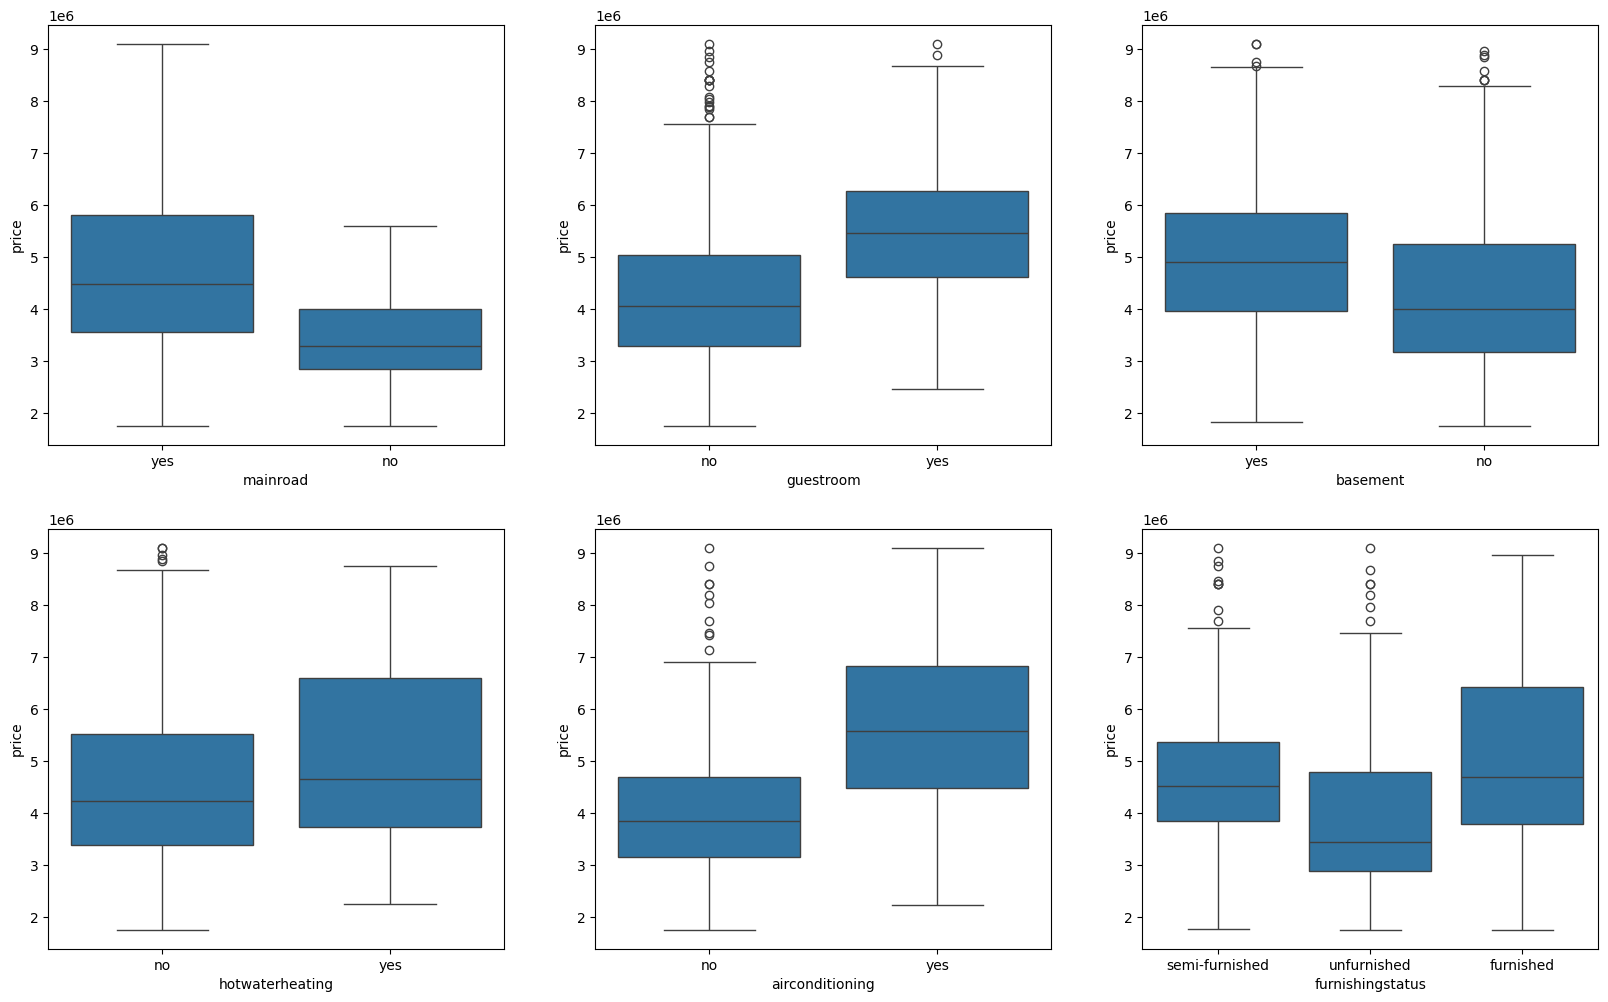

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

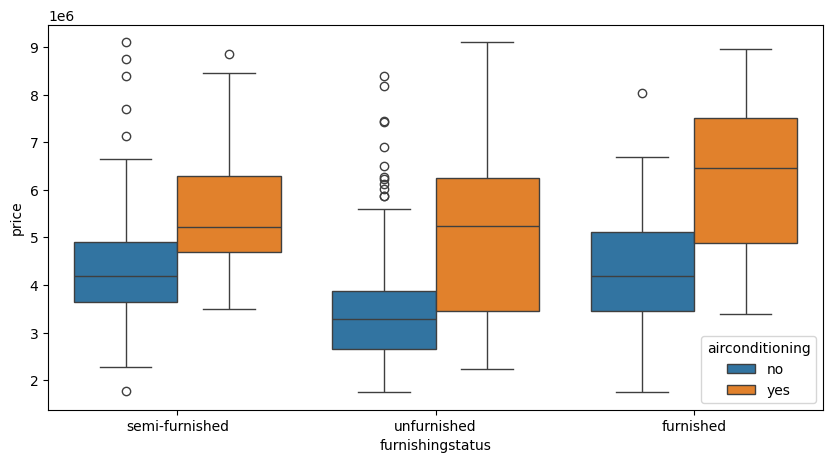

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [16]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [17]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,semi-furnished
16,9100000,6600,4,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,unfurnished
17,8960000,8500,3,2,4,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished
18,8890000,4600,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished
19,8855000,6420,3,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,semi-furnished


In [18]:
status = pd.get_dummies(housing['furnishingstatus'])

In [19]:
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [20]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [21]:
housing = pd.concat([housing, status], axis = 1)

In [22]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,semi-furnished,True,False
16,9100000,6600,4,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,unfurnished,False,True
17,8960000,8500,3,2,4,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished,False,False
18,8890000,4600,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished,False,False
19,8855000,6420,3,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,semi-furnished,True,False


In [23]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,True,False
16,9100000,6600,4,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,False,True
17,8960000,8500,3,2,4,NaN,NaN,NaN,NaN,NaN,2,NaN,False,False
18,8890000,4600,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,False,False
19,8855000,6420,3,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,True,False


In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [26]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,True,False
236,0.390476,0.114134,0.2,0.0,0.333333,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,True,False
356,0.275238,0.072738,0.8,0.5,0.000000,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,False,False
425,0.219048,0.151390,0.2,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,False,False
516,0.095238,0.157895,0.2,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,False,True


In [27]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,0.0,0.0,0.0,0.0,0.0,361.000000,0.0
mean,0.383701,0.350081,0.390582,0.127424,0.268698,NaN,NaN,NaN,NaN,NaN,0.218837,NaN
std,0.209712,0.207184,0.149146,0.224465,0.287833,NaN,NaN,NaN,NaN,NaN,0.287286,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,0.237143,0.189829,0.200000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,0.338095,0.295092,0.400000,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,0.514286,0.491425,0.400000,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN,0.333333,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


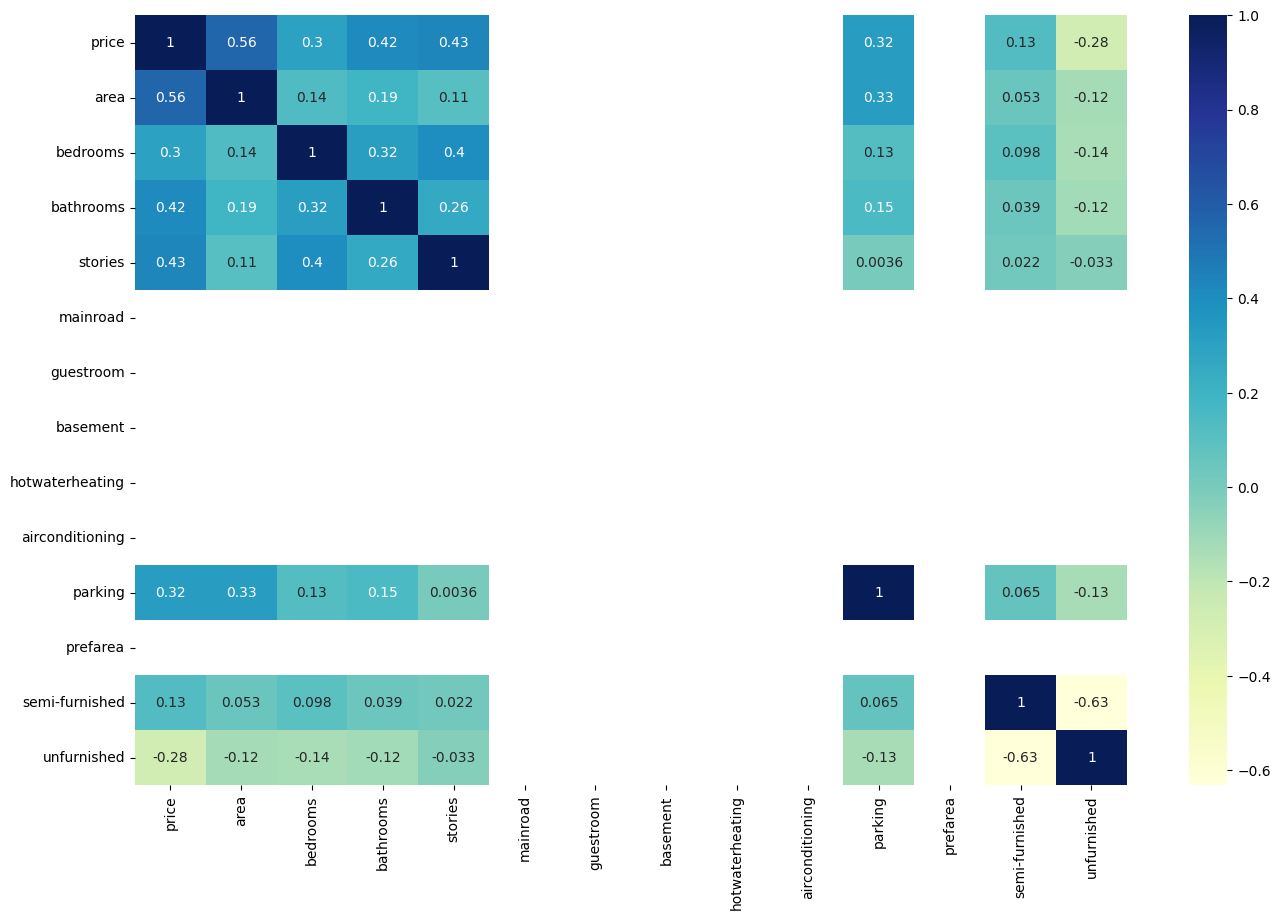

In [28]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [29]:
y_train = df_train.pop('price')
X_train = df_train

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X_train = X_train.fillna(0)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
rfe = RFE(lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', np.True_, np.int64(1)),
 ('bedrooms', np.False_, np.int64(2)),
 ('bathrooms', np.True_, np.int64(1)),
 ('stories', np.True_, np.int64(1)),
 ('mainroad', np.False_, np.int64(4)),
 ('guestroom', np.False_, np.int64(3)),
 ('basement', np.False_, np.int64(8)),
 ('hotwaterheating', np.False_, np.int64(7)),
 ('airconditioning', np.False_, np.int64(6)),
 ('parking', np.True_, np.int64(1)),
 ('prefarea', np.False_, np.int64(5)),
 ('semi-furnished', np.True_, np.int64(1)),
 ('unfurnished', np.True_, np.int64(1))]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'parking', 'semi-furnished',
       'unfurnished'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [37]:
X_train_rfe = X_train[col]

In [38]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
X_train_rfe[['semi-furnished', 'unfurnished']] = X_train_rfe[['semi-furnished', 'unfurnished']].astype(int)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [41]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     73.79
Date:                Fri, 27 Feb 2026   Prob (F-statistic):           2.17e-59
Time:                        15:36:27   Log-Likelihood:                 198.58
No. Observations:                 361   AIC:                            -383.2
Df Residuals:                     354   BIC:                            -355.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1634      0.022      7.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.75
6,unfurnished,1.72
5,semi-furnished,1.67
1,area,1.16
4,parking,1.14
2,bathrooms,1.12
3,stories,1.08


In [43]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [44]:
y_test = df_test.pop('price')
X_test = df_test

X_test = sm.add_constant(X_test)

In [45]:
#predictions
X_test_rfe = X_test[X_train_rfe.columns]

y_pred = lm.predict(X_test_rfe)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5347565146042007

Text(0, 0.5, 'y_pred')

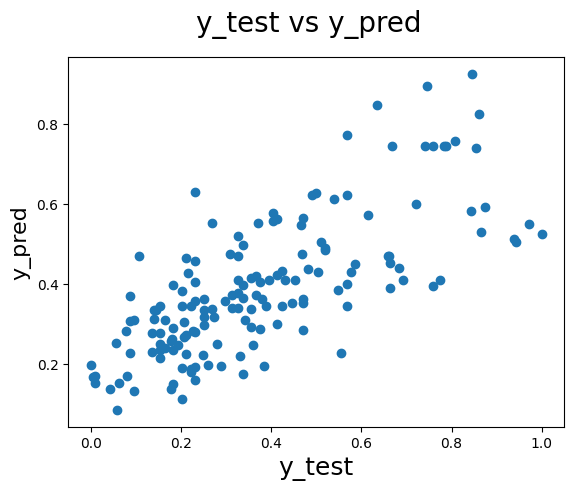

In [46]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)